<a href="https://colab.research.google.com/github/NguyenVanHien8502/image-classification/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount google drive

In [75]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Import libraries

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import random
import struct
import gzip

import tensorflow as tf
from tensorflow import keras
from keras.api._v2.keras import layers


#1. Load Data from file .gz

In [77]:
#Load image train
filename = '/content/drive/MyDrive/Colab_Notebooks/train-images-idx3-ubyte.gz'

with gzip.open(filename, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    X_train = np.frombuffer(f.read(), dtype=np.uint8)
    X_train = X_train.reshape(size, nrows, ncols)

In [78]:
#Load label train
filename = '/content/drive/MyDrive/Colab_Notebooks/train-labels-idx1-ubyte.gz'

with gzip.open(filename, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    y_train = np.frombuffer(f.read(), dtype=np.uint8)
    y_train = y_train.reshape((size,))

In [79]:
#Load image test
filename = '/content/drive/MyDrive/Colab_Notebooks/t10k-images-idx3-ubyte.gz'

with gzip.open(filename, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    X_test = np.frombuffer(f.read(), dtype=np.uint8)
    X_test = X_test.reshape(size, nrows, ncols)

In [80]:
#Load label test
filename = '/content/drive/MyDrive/Colab_Notebooks/t10k-labels-idx1-ubyte.gz'

with gzip.open(filename, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    y_test = np.frombuffer(f.read(), dtype=np.uint8)
    y_test = y_test.reshape((size,))

#2. Check data

In [81]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [82]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [83]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [84]:
class_names = ["Number 0", "Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6", "Number 7", "Number 8", "Number 9"]
class_nums = len(class_names)

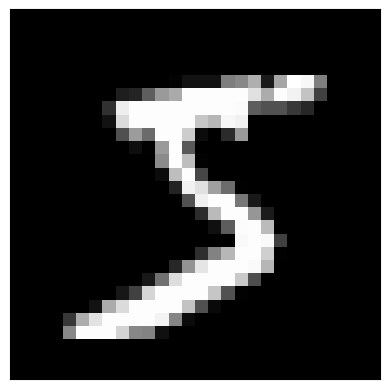

Label: Number 5


In [85]:
plt.imshow(X_train[0,:,:], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
print(f"Label: {class_names[y_train[0]]}")

In [86]:
from typing import Optional
def plot_data(x_data: np.ndarray, y_data:np.ndarray, y_proba: Optional[np.ndarray] = None)->None:
  nrows, ncols=2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))

  len_x = x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]
    img_idx = random.randint(0, len_x)
    ax.imshow(x_data[img_idx], cmap='gray')
    ax.set(xticks=[], yticks=[])
    color = 'green'

    true_label_str = f"True: {class_names[y_data[img_idx]]}"

    if y_proba is not None:
      predicted_idx = np.argmax(y_proba[img_idx])
      predicted_label = class_names[predicted_idx]
      color = 'red' if predicted_idx != y_data[img_idx] else color
      predicted_label_str = f"\nPredicted: {predicted_label}"

    img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
    ax.set_xlabel(img_title, color=color, fontsize=12)

  plt.tight_layout()
  plt.show()

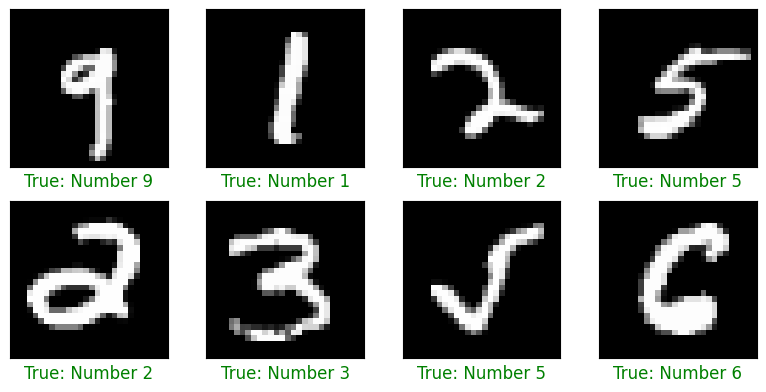

In [87]:
plot_data(X_train, y_train)

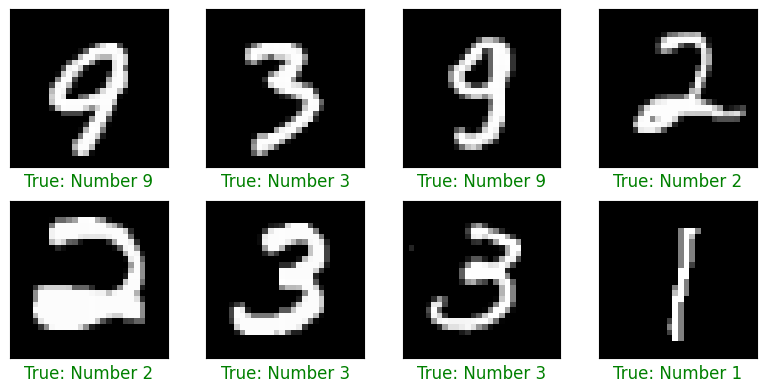

In [88]:
plot_data(X_test, y_test)

#3. Image Pre-processing

In [89]:
#Convert to float32 & scale images to the [0,1] range for training
X_train=X_train.astype(np.float32) / 255
X_test=X_test.astype(np.float32) / 255

In [90]:
X_train.shape, X_train.dtype

((60000, 28, 28), dtype('float32'))

In [91]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('float32'))

In [92]:
#Make sure images have shape (60000, 28, 28) => (60000, 28, 28, 1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [93]:
X_train.shape, X_train.dtype

((60000, 28, 28, 1), dtype('float32'))

In [94]:
X_test.shape, X_test.dtype

((10000, 28, 28, 1), dtype('float32'))

In [95]:
#convert class vector to binary class matrics: 1 => [0 1 0 0 ...]
#1 => sparse_categorical_crossentropy
#[0 1 0 0 ...] => categorical_crossentropy
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [96]:
y_train[0], y_train_label[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

#3. Network (ANN) Architecture

In [97]:
input_shape = (28, 28, 1)

In [98]:
model = keras.models.Sequential([
    layers.Flatten(input_shape = input_shape), #(28, 28, 1)->vector 1 chiều (28*28)
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax'),
    ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [100]:
epochs = 10
batch_size = 128
history = model.fit(X_train, y_train_label,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1
          )

Epoch 1/10
422/422 [==============================] - 6s 13ms/step - loss: 0.2539 - accuracy: 0.9223 - val_loss: 0.1017 - val_accuracy: 0.9697
Epoch 2/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0917 - accuracy: 0.9722 - val_loss: 0.0764 - val_accuracy: 0.9755
Epoch 3/10
422/422 [==============================] - 5s 12ms/step - loss: 0.0591 - accuracy: 0.9814 - val_loss: 0.0704 - val_accuracy: 0.9792
Epoch 4/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0414 - accuracy: 0.9864 - val_loss: 0.0757 - val_accuracy: 0.9803
Epoch 5/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0666 - val_accuracy: 0.9820
Epoch 6/10
422/422 [==============================] - 5s 12ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0780 - val_accuracy: 0.9817
Epoch 7/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0885 - val_accuracy: 0.9818

In [101]:
history_dict = history.history

In [102]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [103]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

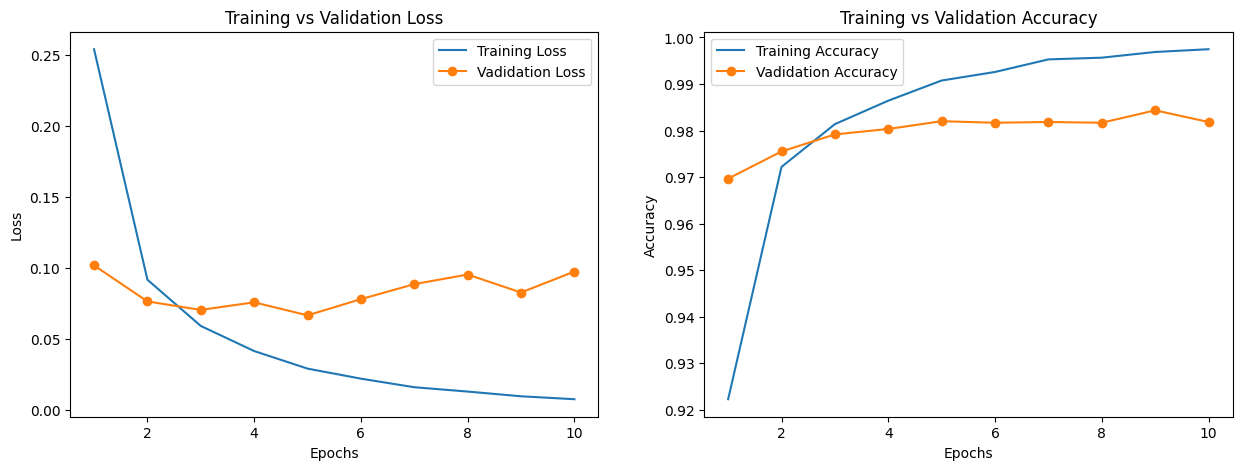

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
epochs_runs = [i+1 for i in range(epochs)]

ax1.plot(epochs_runs, train_loss, label='Training Loss')
ax1.plot(epochs_runs, val_loss, label='Vadidation Loss', marker='o')
ax1.set(title='Training vs Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epochs_runs, train_acc, label='Training Accuracy')
ax2.plot(epochs_runs, val_acc, label='Vadidation Accuracy', marker='o')
ax2.set(title='Training vs Validation Accuracy', xlabel='Epochs', ylabel='Accuracy')
ax2.legend()

plt.show()

#4. Model Evaluation

In [105]:
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 2s 6ms/step - loss: 0.0850 - accuracy: 0.9819


In [106]:
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

Test Loss: 0.0850
Test Accuracy: 0.9819


In [107]:
X_sample = X_test[:3]
y_proba_sample = model.predict(X_sample)

1/1 [==============================] - 0s 68ms/step


In [108]:
y_proba_sample.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [109]:
predictions = np.argmax(y_proba_sample, axis=1)

In [110]:
[class_names[pred] for pred in predictions]

['Number 7', 'Number 2', 'Number 1']

In [111]:
y_proba = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


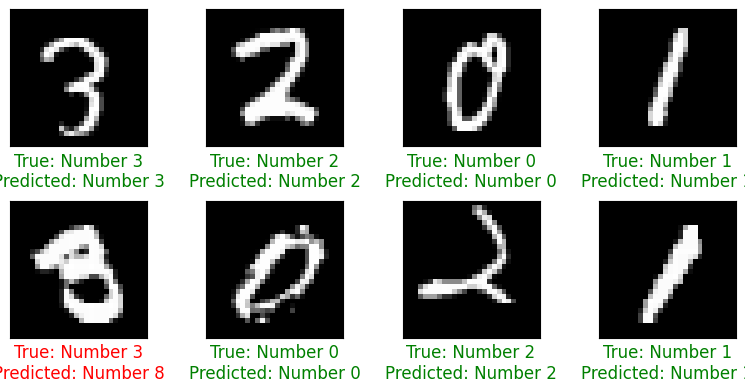

In [114]:
plot_data(X_test, y_test, y_proba)